In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [20]:
data = pd.read_csv('train.csv')

In [21]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [22]:
data.isnull().mean()*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [23]:
#only about 2% is missing data hence we can drop those values
data.dropna()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [24]:
data.drop('PassengerId',axis=1)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


<ipython-input-25-b6d6c3829364>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cbar=True,annot=True)


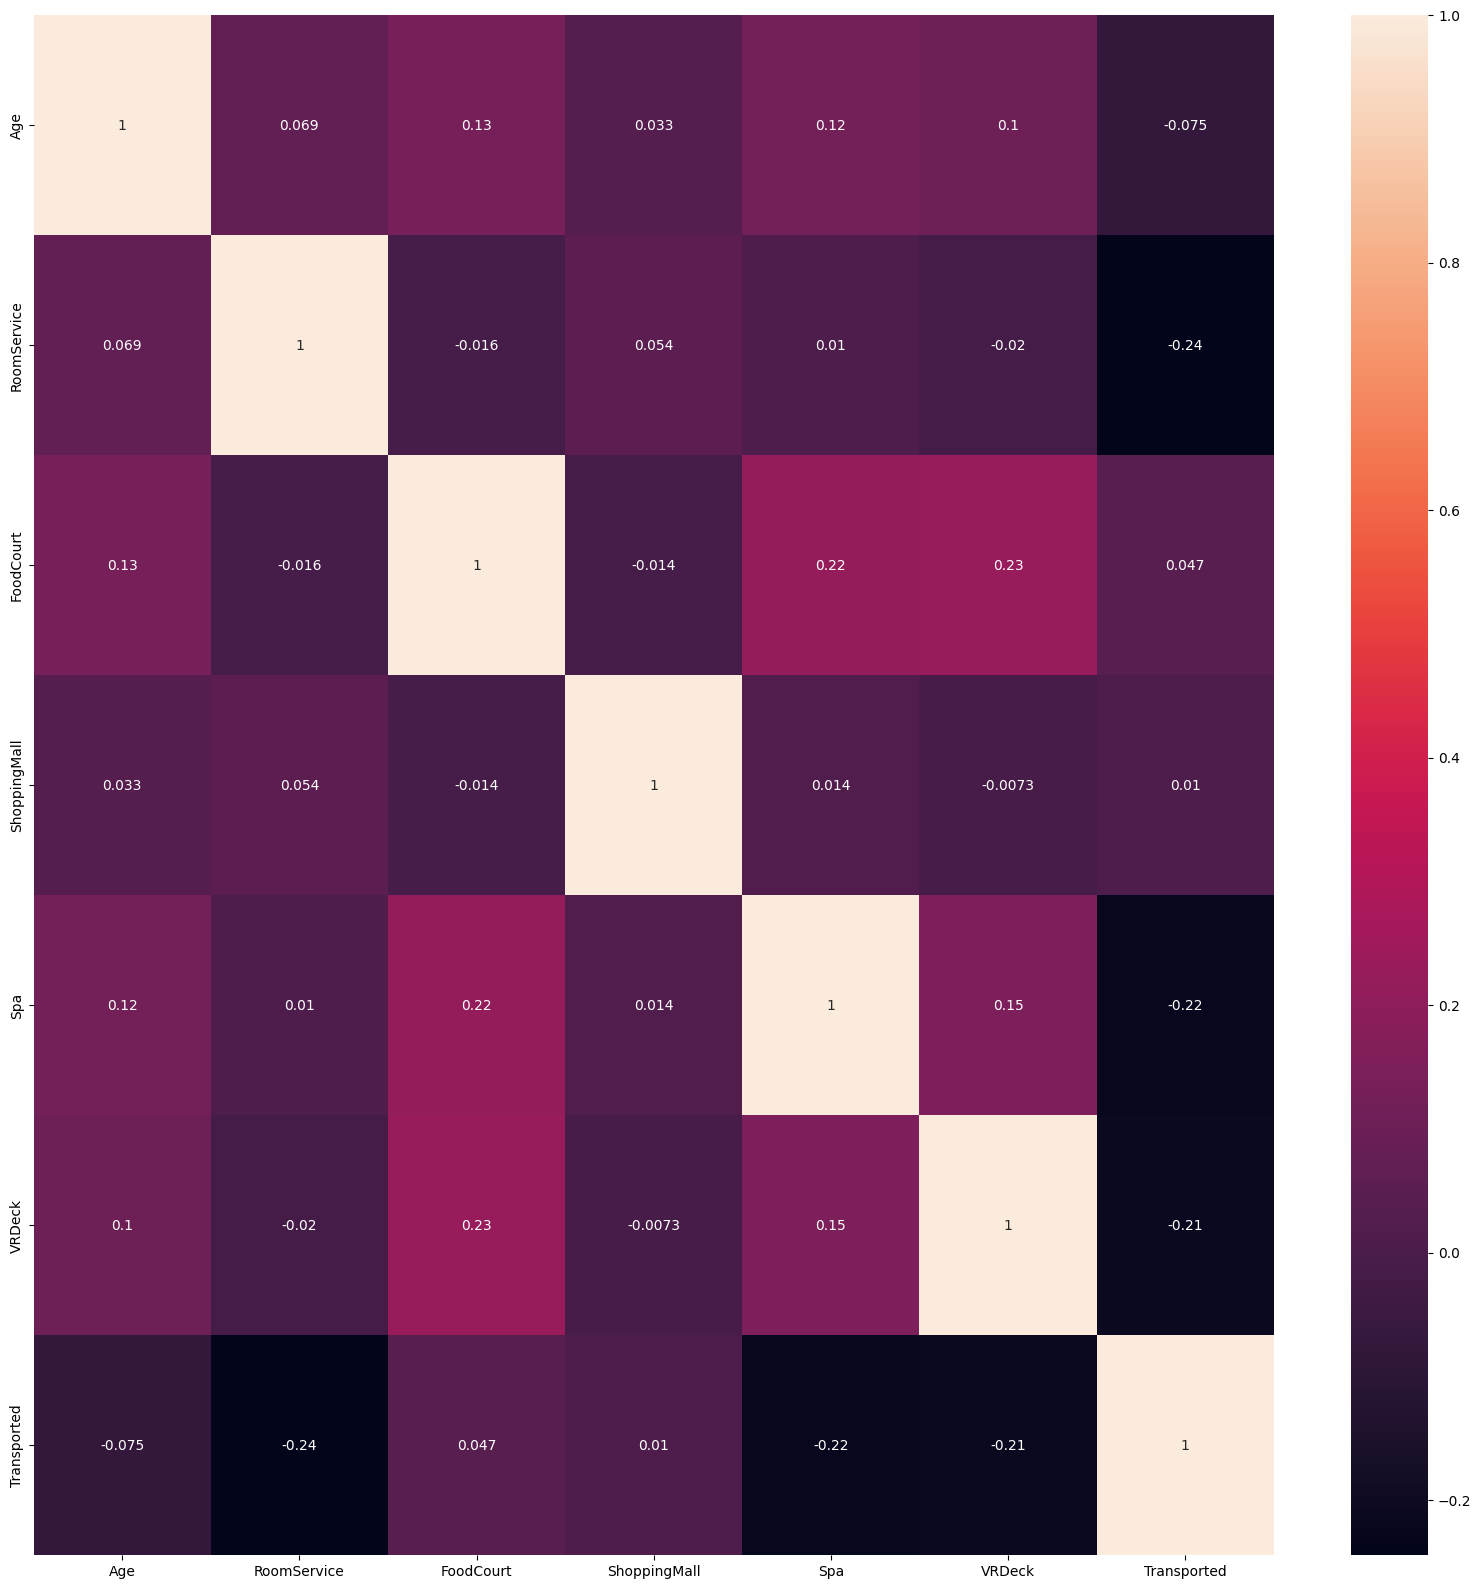

In [25]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cbar=True,annot=True)
plt.show()


<Axes: xlabel='Transported'>

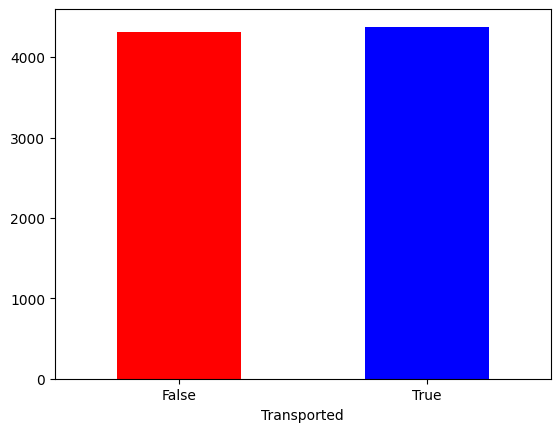

In [26]:
num_types = data.groupby(by='Transported').size()
num_types.plot.bar(color=['red','blue'],rot=0)

In [27]:
#data is 50-50
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for column in data.columns:
  data[column] = LE.fit_transform(data[column])

In [28]:
data
df = data

In [29]:
scay = MinMaxScaler()
df = scay.fit_transform(df)
df =  pd.DataFrame(df,columns = data.columns)

In [32]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,1,0,149,2,39,0,0,0,0,0,0,5252,0
1,1,0,0,2184,2,24,0,109,9,25,456,44,4502,1
2,2,1,0,1,2,58,1,43,1206,0,1273,49,457,0
3,3,1,0,1,2,33,0,0,806,332,1132,187,7149,0
4,4,0,0,2186,2,16,0,277,69,149,470,2,8319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,1,0,146,0,41,1,0,1389,0,932,74,3524,0
8689,8689,0,1,5280,1,18,0,0,0,0,0,0,4780,0
8690,8690,0,0,5285,2,26,0,0,0,972,1,0,3002,1
8691,8691,1,0,2131,0,32,0,0,739,0,321,1113,1596,0


In [81]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.333333,0.0,0.666667,0.4875,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.666667,0.3000,0,0.085625,0.005972,0.022422,0.343632,0.033691
2,0.333333,0.0,0.666667,0.7250,1,0.033778,0.800265,0.000000,0.959307,0.037519
3,0.333333,0.0,0.666667,0.4125,0,0.000000,0.534837,0.297758,0.853052,0.143185
4,0.000000,0.0,0.666667,0.2000,0,0.217596,0.045786,0.133632,0.354182,0.001531
...,...,...,...,...,...,...,...,...,...,...
8688,0.333333,0.0,0.000000,0.5125,1,0.000000,0.921699,0.000000,0.702336,0.056662
8689,0.000000,0.5,0.333333,0.2250,0,0.000000,0.000000,0.000000,0.000000,0.000000
8690,0.000000,0.0,0.666667,0.3250,0,0.000000,0.000000,0.871749,0.000754,0.000000
8691,0.333333,0.0,0.000000,0.4000,0,0.000000,0.490378,0.000000,0.241899,0.852221


In [80]:

df['VIP'] = data['VIP']
df.drop('PassengerId',axis=1,inplace = True)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
svm_model = SVC()
LR_model = LogisticRegression()
RandomF_model = RandomForestClassifier()
mlp_model = MLPClassifier()

In [83]:
df.drop('Transported',axis=1,inplace=True)

KeyError: ignored

In [85]:
X_train,X_test,Y_train,Y_test = train_test_split(df, data['Transported'], test_size=0.30, random_state=42)

In [86]:
svm_model.fit(X_train,Y_train)
RandomF_model.fit(X_train,Y_train)
LR_model.fit(X_train,Y_train)
mlp_model.fit(X_train,Y_train)
KNN_model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


KNeighborsClassifier()

In [87]:
y_lr_pred = LR_model.predict(X_test)
y_knn_pred = KNN_model.predict(X_test)
y_RF_pred = RandomF_model.predict(X_test)
y_svm_pred = svm_model.predict(X_test)
y_mlp_pred = mlp_model.predict(X_test)

In [88]:
from sklearn import metrics
print(f"Logistic Regression Classifier: {metrics.accuracy_score(Y_test,y_lr_pred)}")
print(f"KNN Classifier: {metrics.accuracy_score(Y_test,y_knn_pred)}")
print(f"SVM: {metrics.accuracy_score(Y_test,y_svm_pred)}")
print(f"MLP: {metrics.accuracy_score(Y_test,y_mlp_pred)}")
print(f"Random Forest Classifier: {metrics.accuracy_score(Y_test,y_RF_pred)}")

Logistic Regression Classifier: 0.745782208588957
KNN Classifier: 0.7615030674846626
SVM: 0.781058282208589
MLP: 0.7806748466257669
Random Forest Classifier: 0.7791411042944786


In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gba = GradientBoostingClassifier()
gba.fit(X_train,Y_train)

GradientBoostingClassifier()

In [90]:
gba_pred = gba.predict(X_test)
print(metrics.accuracy_score(Y_test,gba_pred)) #best

0.785659509202454


In [91]:
from sklearn.ensemble import AdaBoostClassifier
DT = AdaBoostClassifier()
DT.fit(X_train,Y_train)
dt_pred = DT.predict(X_test)
print(metrics.accuracy_score(Y_test,dt_pred))

0.7772239263803681


In [92]:
df3 = pd.read_csv('test.csv')

In [93]:
df3

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [96]:
id = df3['PassengerId']
id= pd.DataFrame(id)
id

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [100]:
id.to_csv('/content/out/meri_file.csv')

In [102]:
df3.drop('PassengerId',axis=1,inplace=True)
df3.drop('Cabin',axis=1,inplace=True)
df3.drop('Name',axis=1,inplace=True)

In [103]:
for column in df3.columns:
  df3[column] = LE.fit_transform(df3[column])

In [105]:
df4 = scay.fit_transform(df3)
df4 =  pd.DataFrame(df4,columns = df3.columns)

In [112]:
gba_pred = gba.predict(df4)

In [113]:
gba_pred =  pd.DataFrame(gba_pred)

In [110]:
gba_pred = LE.inverse_transform(gba_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
gba_pred

,0
0,1
1,0
2,1
3,1
4,1
...,...
4272,1
4273,0
4274,1
4275,1


In [122]:
for element in gba_pred[0]:
  if element ==1:
    element="True"
  else:
    element="False"

In [123]:
gba_pred

,0
0,1
1,0
2,1
3,1
4,1
...,...
4272,1
4273,0
4274,1
4275,1


In [115]:
gba_pred.to_csv('/content/out/meri_file2.csv')